# 심화 과제 1 - Solve Computer vision task using MLP 
1) 과제 개요
- 본 과제는 MLP 모델을 이용하여 Computer vision task를 해결을 목표로 하는 과제 입니다.
- 본 과제는 다음과 같은 단계로 진행됩니다.
    0. debug image data 만들기
    1. MLP 모델 설계
    2. 데이터셋 준비
    3. 모델 학습
    4. 모델 평가
    5. 모델 저장 및 불러오기
    6. 새로운 이미지에 대한 추론
2) 과제 출제 목적 및 배경
- 본 과제는 목표하는 모델을 설계하고 학습하는 과정을 통해 딥러닝 모델을 설계하고 학습하는 방법을 익히기 위한 것입니다.
- 목표한 모델을 잘 만들었는지 확인하는 디버깅 능력 또한 함양하기 위한 것입니다.
- 논문에서 제시한 모델을 구현하는 능력을 함양하기 위한 것입니다.

3) 과제 수행 방법

주어진 코드에서 [START CODE]과 [END CODE] 주석 사이의 셀을 완성하여 과제를 수행합니다. 해당 셀에서 목표하는 기능을 달성할 수 있도록 코드를 작성해 주세요.

4) 구현 딥러닝 모델
- MLP-Mixer
- MLP-Mixer는 MLP 모델을 이용하여 Computer vision task를 해결하기 위한 모델입니다.
- MLP-Mixer는 다음과 같은 구조로 이루어져 있습니다.
    - MLP-Mixer는 Token-mixing MLP과 Channel-mixing MLP로 구성되어 있습니다.
    - Token-mixing MLP는 이미지의 각 픽셀에 대한 정보를 섞어주는 역할을 합니다.
    - Channel-mixing MLP는 이미지의 각 채널에 대한 정보를 섞어주는 역할을 합니다.

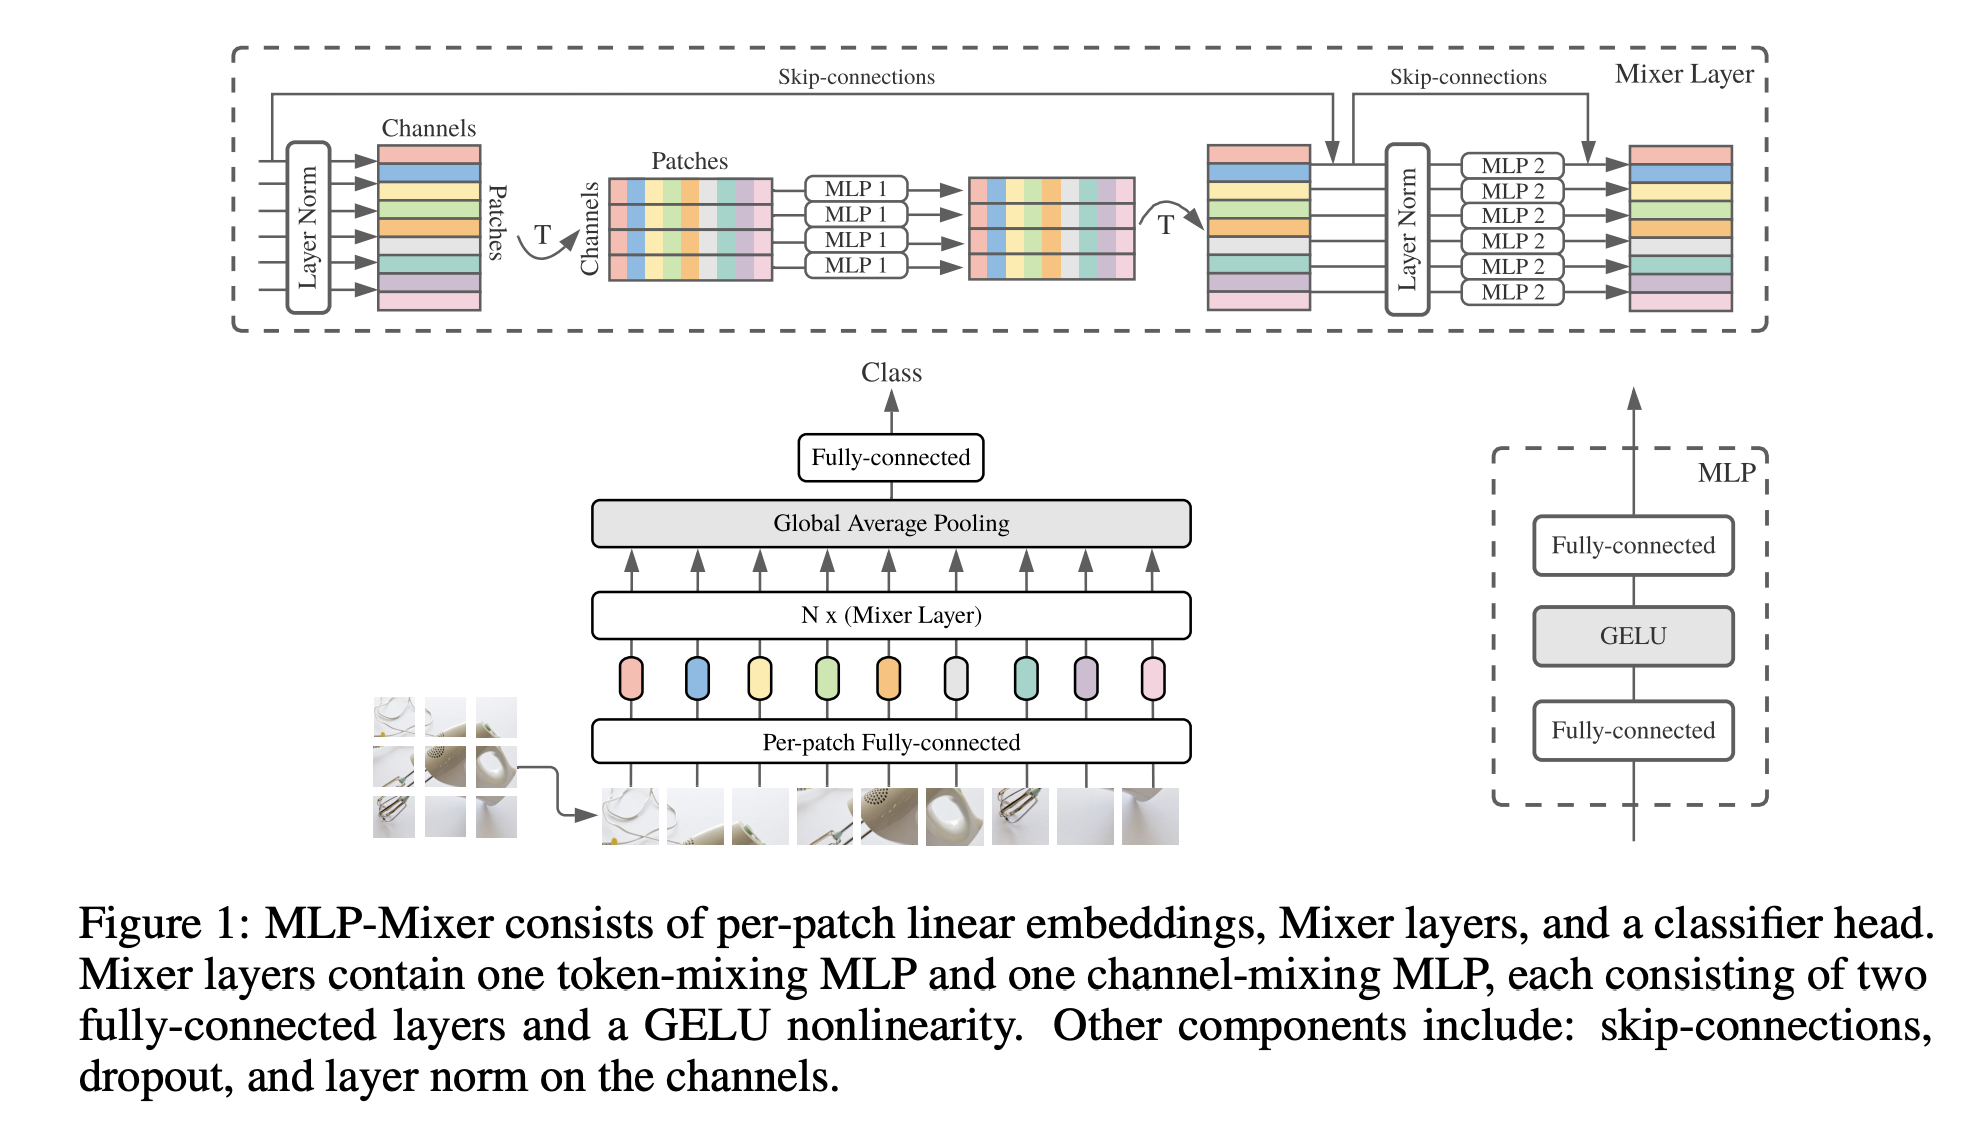

5) 사용 데이터셋

- 본 과제에서는 CIFAR-10 데이터셋을 사용합니다.

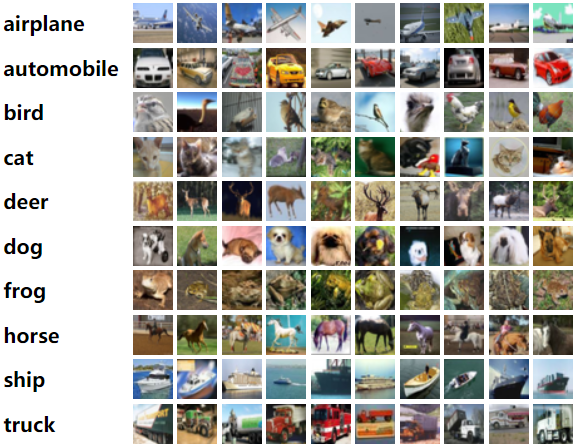

In [2]:
import torch
import torch.nn as nn

In [9]:
class CustomMLP(nn.Module):
    def __init__(self, input_size: int, hidden_size: list, output_size: int):
        super().__init__()

        self.hidden_layers = nn.ModuleList()

        for i in range(len(hidden_size)):
            if i == 0:
                self.hidden_layers.append(self.hidden_block(input_size, hidden_size[i]))
            else:
                self.hidden_layers.append(
                    self.hidden_block(hidden_size[i - 1], hidden_size[i])
                )

        self.output_layer = nn.Linear(hidden_size[-1], output_size)

    def hidden_block(self, input_size: int, hidden_size: int):
        return nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
        )

    def forward(self, x):
        x = x.flatten(start_dim=1)
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.output_layer(x)
        return x

Files already downloaded and verified
Files already downloaded and verified
epoch: 1, train loss: 1.9344, test loss: 1.8298, test acc: 0.3220
epoch: 2, train loss: 1.7552, test loss: 1.7176, test acc: 0.3806
epoch: 3, train loss: 1.6949, test loss: 1.6655, test acc: 0.3967
epoch: 4, train loss: 1.6560, test loss: 1.6449, test acc: 0.4104
epoch: 5, train loss: 1.6269, test loss: 1.6230, test acc: 0.4172
epoch: 6, train loss: 1.6036, test loss: 1.5949, test acc: 0.4256
epoch: 7, train loss: 1.5838, test loss: 1.5805, test acc: 0.4331
epoch: 8, train loss: 1.5685, test loss: 1.5733, test acc: 0.4400
epoch: 9, train loss: 1.5515, test loss: 1.5847, test acc: 0.4319
epoch: 10, train loss: 1.5379, test loss: 1.5677, test acc: 0.4450
epoch: 11, train loss: 1.5341, test loss: 1.5557, test acc: 0.4437
epoch: 12, train loss: 1.5240, test loss: 1.5322, test acc: 0.4528
epoch: 13, train loss: 1.5150, test loss: 1.5705, test acc: 0.4478
epoch: 14, train loss: 1.5139, test loss: 1.5754, test acc: 0.

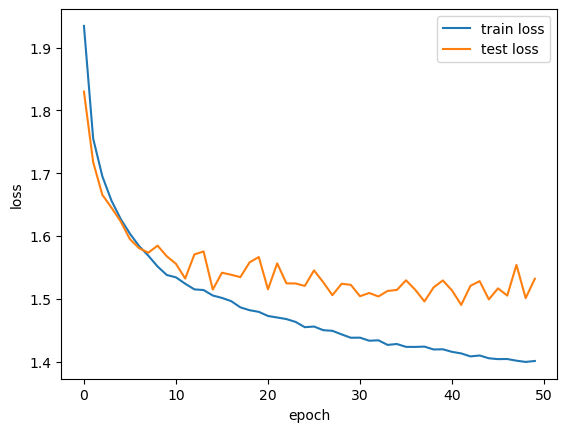

In [12]:
# import cifar10 dataset
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

transform = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

cifar10_train = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
cifar10_test = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)

train_loader = torch.utils.data.DataLoader(cifar10_train, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(cifar10_test, batch_size=32, shuffle=False)

# [CORRECT CODE]
import torch.optim as optim

# [START CODE]
# model = MLPMixer()
model = CustomMLP(32 * 32 * 3, [64, 32, 16], 10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# [END CODE]


def train(model, train_loader, criterion, optimizer, device):
    model.train
    model.to(device)
    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):

        image = data[0].to(device)
        label = data[1].to(device)

        optimizer.zero_grad()

        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    return running_loss / len(train_loader)


def test(model, test_loader, criterion, device):
    model.eval()
    model.to(device)
    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():
        for data in test_loader:
            image = data[0].to(device)
            label = data[1].to(device)

            output = model(image)
            loss = criterion(output, label)
            running_loss += loss.item()

            _, predicted = torch.max(output, 1)
            total += label.size(0)
            correct += (predicted == label).sum().item()

    return running_loss / len(test_loader), correct / total


def do_train_test(
    model, train_loader, test_loader, criterion, optimizer, device, num_epochs
):
    train_loss_list = []
    test_loss_list = []
    test_acc_list = []

    for epoch in range(num_epochs):
        train_loss = train(model, train_loader, criterion, optimizer, device)
        test_loss, test_acc = test(model, test_loader, criterion, device)

        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        test_acc_list.append(test_acc)

        print(
            f"epoch: {epoch + 1}, train loss: {train_loss:.4f}, test loss: {test_loss:.4f}, test acc: {test_acc:.4f}"
        )

    plt.plot(train_loss_list, label="train loss")
    plt.plot(test_loss_list, label="test loss")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()
    plt.show()

    plt.plot(test_acc_list, label="test acc")
    plt.xlabel("epoch")
    plt.ylabel("acc")
    plt.legend()
    plt.show()

## Prepare debug image data

- 본 과제에서는 MLP-Mixer 모델을 구현하고 테스트하기 위해 특이한 debug image를 생성하도록 하겠습니다.

- 제안 함수
    - `torch.full` : 주어진 크기와 값을 가지는 tensor를 생성합니다. args로는 `size`, `fill_value`, `dtype`, `device`, `requires_grad가` 있습니다.
    - `torch.cat` : 주어진 dim으로 tensor를 이어붙입니다. args로는 `tensors`, `dim이` 있습니다. (`tensors`는 이어붙일 tensor들의 list입니다.)
    - `torch.randperm` : 주어진 범위 내에서 무작위로 순열을 생성합니다. args로는 `n`이 있습니다.
    - `unsqueeze` : 주어진 위치에 차원을 추가합니다.

위에 제안된 함수를 활용하여 다음과 같은 이미지를 생성해보세요.


In [2]:
# # [START CODE]
# # 각 패치를 생성합니다.
# patches = None

# # 패치를 3x3 그리드에 배치합니다.
# # 3개 패치를 하나의 행으로 결합합니다.
# rows = None
# # 3개 행을 하나의 이미지로 결합합니다.
# debug_image = None

# # 3ch 이미지로 확장합니다.
# debug_image = None

# # [END CODE]

In [3]:
# [CORRECT CODE]
# [START CODE]
# 각 패치를 생성합니다.
patches = [torch.full((3, 3), i) for i in range(9)]

# 패치를 3x3 그리드에 배치합니다.
rows = [torch.cat(patches[i * 3 : (i + 1) * 3], dim=1) for i in range(3)]
debug_image = torch.cat(rows, dim=0)

# 3ch 이미지로 확장합니다.
debug_image = debug_image.unsqueeze(0).repeat(3, 1, 1)

# [END CODE]

### Check debug image data
- 생성된 이미지 데이터를 시각화하여 확인해보세요.

이미지 데이터의 값은 [0, 255]이기 때문에 0과 8 사이의 값으로 시각화 시에는 값의 차이가 크지 않아 잘만들어졌는지 확인하기 어려워 [0, 1]로 normalize 이후 값을 확인하도록 하겠습니다.

- 제안 함수
    - `torch.tensor.permute` : 주어진 차원을 순서대로 바꿉니다.
    - `plt.imshow` : 이미지를 시각화합니다.

In [4]:
import matplotlib.pyplot as plt

In [5]:
# # [START CODE]
# # channels first -> channels last
# channels_last_image = None
# # Normalize the image
# normalized_image = None
# # [END CODE]
# # Show the image
# plt.imshow(normalized_image)

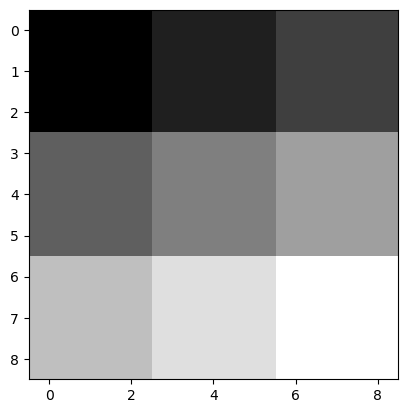

In [6]:
# [CORRECT CODE]
# [START CODE]
# channels first -> channels last
channels_last_image = debug_image.permute(1, 2, 0)
# Normalize the image
normalized_image = channels_last_image / 8
# Show the image
plt.imshow(normalized_image)
# [END CODE]

### Expected output
![image](./assets/debug_image.png)

만든 이미지를 배치 차원을 추가하여 4차원으로 만들고 이를 모델에 적용할 수 있게 하기 위해 float로 변환해주세요.
- 제안함수
    - `unsqueeze` : 주어진 위치에 차원을 추가합니다.
    - `repeat` : 주어진 차원을 반복합니다.
    - `float` : tensor의 dtype을 float로 변경합니다.

In [7]:
# # [CORRECT CODE]
# batch_size = 32
# # [START CODE]
# batch_debug_image = None
# # [END CODE]

In [8]:
# [CORRECT CODE]
batch_size = 32
# [START CODE]
batch_debug_image = debug_image.unsqueeze(0).repeat(batch_size, 1, 1, 1).float()
# [END CODE]

### MLP-Mixer
이제 본격적으로 MLP-Mixer 모델을 구현해보겠습니다.

MLP-Mixer의 가장 첫 부분은 이미지를 각 패치별로 나누는 부분입니다. 이를 위해 이미지를 패치로 나누는 함수를 구현해보겠습니다.

In [9]:
from einops.layers.torch import Rearrange

#### Patch splitting

MLP-Mixer의 가장 첫 부분은 이미지를 각 패치별로 나누는 부분입니다. 이를 위해 이미지를 패치로 나누는 함수를 구현해보겠습니다.

- 제안 함수
    - `torch.nn.unfold` : 주어진 kernel size로 이미지를 나눕니다. args로는 `kernel_size`, `stride`가 있습니다.
    - `einops.layer.torch.Rearrange` : 주어진 차원을 순서대로 바꿉니다.

In [10]:
# [CORRECT CODE]
class PatchSplitter(nn.Module):
    def __init__(self, patch_size, image_size, batch_size):
        super().__init__()
        # [START CODE]
        self.split = Rearrange(
            "b c (h p1) (w p2) -> b (h w) (p1 p2 c)", p1=patch_size, p2=patch_size
        )
        # [END CODE]

    def forward(self, x):
        # [START CODE]
        return self.split(x)
        # [END CODE]

In [11]:
# class PatchSplitter(nn.Module):
#     def __init__(self, patch_size, image_size, batch_size):
#         super().__init__()
#         # [START CODE]
#         self.split = None
#         # [END CODE]

#     def forward(self, x):
#         # [START CODE]

#         return None
#         # [END CODE]

만든 PatchSplitter를 이용하여 이미지를 패치로 나누고 이를 시각화하여 확인해보세요. 

앞서 저희가 만든 `batch_debug_image`의 patch_size는 3이었으니 이를 이용하여 `patch_size`를 `3`으로 설정해주세요.


In [12]:
# [CORRECT CODE]
# [START CODE]
patch_size = 3
image_size = debug_image.shape[2]
batch_size = batch_debug_image.shape[0]

ps = PatchSplitter(patch_size=patch_size, image_size=image_size, batch_size=batch_size)

ps_output = ps(batch_debug_image)
# [END CODE]

In [13]:
# # [CORRECT CODE]
# # [START CODE]
# patch_size = 3
# image_size = debug_image.shape[2]
# batch_size = batch_debug_image.shape[0]

# ps = PatchSplitter(patch_size=patch_size, image_size=image_size, batch_size=batch_size)

# ps_output = ps(batch_debug_image)
# # [END CODE]

##### Expected output
- Expected shape of output : `(batch_size, num_patches, patch_size * patch_size * num_channels)`
    - split된 patch들은 embedding을 위해 flatten되어 `patch_size * patch_size * num_channels`로 변환되어야 합니다.
- Expected value of output : [0, 8]
    - 패치 별로 값이 0부터 8까지 반환되어야 합니다.

In [14]:
# check shape of the output
ps_output.shape

torch.Size([32, 9, 27])

In [15]:
# check the output each patch
for i in range(9):
    print(ps_output[0, i])

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2.])
tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3.])
tensor([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4.])
tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 5., 5., 5., 5., 5., 5., 5.])
tensor([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6.])
tensor([7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7.])


#### Patch Embedding
이제 PatchSplitter를 이용하여 나눈 패치들을 임베딩하는 부분을 구현해보겠습니다.

- 제안 함수
    - `torch.nn.Linear` : 주어진 input을 linear transformation합니다. args로는 `in_features`, `out_features`가 있습니다.

In [16]:
# [CORRECT CODE]
class PatchEmbLayer(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        # [START CODE]
        self.linear = nn.Linear(in_features, out_features)
        # [END CODE]

    def forward(self, x):
        # [START CODE]
        return self.linear(x)
        # [END CODE]

In [17]:
# class PatchEmbLayer(nn.Module):
#     def __init__(self, in_features, out_features):
#         super().__init__()
#         # [START CODE]
#         self.linear = None
#         # [END CODE]

#     def forward(self, x):
#         # [START CODE]
#         return None
#         # [END CODE]

##### Expected output
분할된 패치들을 임베딩한 결과를 확인을 위해 `weight와 bias를 2`로 설정하고 결과를 확인해보세요.

- Expected shape of output : `(batch_size, num_patches, embed_dim)`
    - split된 patch들은 embedding을 통해 `embed_dim`차원으로 변환되어야 합니다.
- Expected value of output : [2, 56, 110, ..., 434]
    - patch_0의 벡터 경우 깂들이 0으로 구성되어 있고 이를 2로 구성되어 있는 weight와 matrix multiplication한 이후 bias를 더한 값이 나와야 합니다.
    - patch_0 : 2
    - patch_1 : 56
    - patch_2 : 110
    - ...
    - patch_8 : 434

- 제안 함수
    - `parameters` : 모델의 parameter를 반환합니다.
    - `fill` : tensor의 값을 주어진 값으로 채웁니다.

In [18]:
# [CORRECT CODE]
output_features = 32
# [START CODE]
in_features = ps_output.shape[-1]

pe = PatchEmbLayer(in_features=in_features, out_features=output_features)
for pe_parameter in pe.parameters():
    pe_parameter.data.fill_(2)
pe_output = pe(ps_output)
# [END CODE]

In [19]:
# output_features = 32
# # [START CODE]
# in_features = None

# pe = PatchEmbLayer(in_features=in_features, out_features=output_features)

# # change the weight of the linear layer to 2
# # something to do with the weight initialization

# pe_output = pe(ps_output)
# # [END CODE]

In [20]:
# check shape of the output
# b n d (batch, number of patches, embedding dimension)
pe_output.shape

torch.Size([32, 9, 32])

In [21]:
# check the output each patch
for i in range(9):
    # input data
    print(f"This patch is {i}th patch input")
    print(ps_output[0, i])
    # output data
    print(f"This patch is {i}th patch output")
    print(pe_output[0, i])

This patch is 0th patch input
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.])
This patch is 0th patch output
tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       grad_fn=<SelectBackward0>)
This patch is 1th patch input
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1.])
This patch is 1th patch output
tensor([56., 56., 56., 56., 56., 56., 56., 56., 56., 56., 56., 56., 56., 56.,
        56., 56., 56., 56., 56., 56., 56., 56., 56., 56., 56., 56., 56., 56.,
        56., 56., 56., 56.], grad_fn=<SelectBackward0>)
This patch is 2th patch input
tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2.])
This patch is 2th patch output
tensor([110., 110., 110., 110., 110., 110., 110., 1

In [22]:
# # compare conv2d
# conv = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=3)
# for conv_parameter in conv.parameters():
#     conv_parameter.data.fill_(2)
# conv_output = conv(batch_debug_image)
# conv_output = conv_output.flatten(start_dim=2).permute(0, 2, 1)

# for i in range(9):
#     print(pe_output[0, i])
#     print(conv_output[0, i])

In [23]:
weight_fill_value = 2
test_weights = torch.full((27, 32), weight_fill_value)
test_bias = weight_fill_value
for i in range(9):
    test_input = torch.full((27,), i)
    print(test_input @ test_weights + test_bias)

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2])
tensor([56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56,
        56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56])
tensor([110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110,
        110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110,
        110, 110, 110, 110])
tensor([164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164,
        164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164,
        164, 164, 164, 164])
tensor([218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218,
        218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218,
        218, 218, 218, 218])
tensor([272, 272, 272, 272, 272, 272, 272, 272, 272, 272, 272, 272, 272, 272,
        272, 272, 272, 272, 272, 272, 272, 272, 272, 272, 272, 272, 272, 272,
        272, 272, 272, 272])
te

#### MLP-Mixer Layer

MixerLayer에서 Token과 Channel을 섞는 부분이 핵심이 되어 사용되는 벡터의 차원의 의미를 이해하고 구현해보세요.
그리고 MixerLayer에는 skip-connect가 두 곳이 있습니다. 이를 유의하여 구현해보세요.
(* skip-connect는 방정식으로 표현하면 `x + f(x)`가 됩니다.)

- 제안 함수
    - `torch.nn.Linear` : 주어진 input을 linear transformation합니다. args로는 `in_features`, `out_features`가 있습니다.
    - `torch.nn.LayerNorm` : 주어진 shape에 대해 layer normalization을 수행합니다. args로는 `normalized_shape`, `eps`, `elementwise_affine`가 있습니다.
    - `torch.nn.functional.gelu` : gelu activation function을 수행합니다.
    - `Rearrange` : 주어진 차원을 순서대로 바꿉니다.

In [55]:
# [CORRECT CODE]
class MLP(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super().__init__()
        # [START CODE]
        self.linear_1 = nn.Linear(in_features, hidden_features)
        self.activation = nn.GELU()
        self.linear_2 = nn.Linear(hidden_features, out_features)
        # [END CODE]

    def forward(self, x):
        # [START CODE]
        x = self.linear_1(x)
        x = self.activation(x)
        x = self.linear_2(x)
        return x
        # [END CODE]


class MixerLayer(nn.Module):
    def __init__(self, emb_dim, hidden_dim, n_patch):
        super().__init__()
        # [START CODE]
        self.layer_norm_1 = nn.LayerNorm(emb_dim)

        self.mlp_1 = nn.Sequential(
            Rearrange("b n c -> b c n"),
            MLP(n_patch, hidden_dim, n_patch),
            Rearrange("b c n -> b n c"),
        )

        self.layer_norm_2 = nn.LayerNorm(emb_dim)
        self.mlp_2 = MLP(emb_dim, hidden_dim, emb_dim)
        # [END CODE]

    def forward(self, x):
        # [START CODE]
        norm_x = self.layer_norm_1(x)
        out_1 = self.mlp_1(norm_x) + x
        norm_out_1 = self.layer_norm_2(out_1)
        out_2 = self.mlp_2(norm_out_1)
        out_2 = out_2 + out_1
        return out_2
        # [END CODE]

In [28]:
# # [CORRECT CODE]
# class MLP(nn.Module):
#     def __init__(self, in_features, hidden_features, out_features):
#         super().__init__()
#         # [START CODE]
#         self.linear_1 = None
#         self.activation = None
#         self.linear_2 = None
#         # [END CODE]

#     def forward(self, x):
#         # [START CODE]
#         return None
#         # [END CODE]

# class MixerLayer(nn.Module):
#     def __init__(self, emb_dim, hidden_dim, n_patch):
#         super().__init__()
#         # [START CODE]
#         self.layer_norm_1 = None

#         self.mlp_1 = None

#         self.layer_norm_2 = None
#         self.mlp_2 = None
#         # [END CODE]

#     def forward(self, x):
#         # [START CODE]
#         return None
#         # [END CODE]

In [56]:
pe_output.shape

torch.Size([32, 9, 32])

In [57]:
# [CORRECT CODE]
hidden_dim = 64
# [START CODE]
n_patch = pe_output.shape[1]
emb_dim = pe_output.shape[2]
mixer_layer = MixerLayer(emb_dim=emb_dim, n_patch=n_patch, hidden_dim=hidden_dim)

mixer_layer_output = mixer_layer(pe_output)
# [END CODE]

In [ ]:
# hidden_dim = 64
# # [START CODE]
# n_patch = None
# emb_dim = None
# mixer_layer = MixerLayer(emb_dim=emb_dim, n_patch=n_patch, hidden_dim=hidden_dim)

# mixer_layer_output = mixer_layer(pe_output)
# # [END CODE]

In [58]:
mixer_layer_output.shape

torch.Size([32, 9, 32])

#### MLP-Mixer
앞서 만든 `PatchSplitter`, `PatchEmbedding`, `MixerLayer`를 이용하여 MLP-Mixer를 구현해보겠습니다. 이중 MixerLayer는 여러 개의 MixerLayer로 이루어질 수 있게 만들고 각 layer의 hidden_dim을 각각 다르게 설정할 수 있게 만들어보세요.

- 제안 함수
    - `torch.nn.ModuleList` : 주어진 모듈들을 리스트로 묶어주는 역할을 합니다.



In [59]:
# [CORRECT CODE]
class MLPMixer(nn.Module):
    def __init__(
        self,
        image_size: int = 32,
        patch_size: int = 4,
        emb_dim: int = 32,
        hidden_dim: list = [64, 32, 16],
        num_classes: int = 10,
    ):
        super().__init__()
        # [START CODE]
        # check the image size is divisible by patch size
        assert (
            image_size % patch_size == 0
        ), "Image size must be divisible by patch size"
        self.num_patches = (image_size // patch_size) ** 2

        self.patch_splitter = PatchSplitter(patch_size, image_size, batch_size)

        self.patch_emb = PatchEmbLayer(patch_size * patch_size * 3, emb_dim)

        self.layers = nn.ModuleList([])

        for i, h_d in enumerate(hidden_dim):
            self.layers.append(MixerLayer(emb_dim, h_d, self.num_patches))

        self.output_layer = nn.Linear(emb_dim, num_classes)
        # [END CODE]

    def forward(self, x):
        # [START CODE]
        x = self.patch_splitter(x)
        x = self.patch_emb(x)

        for layer in self.layers:
            x = layer(x)

        x = x.mean(dim=1)
        x = self.output_layer(x)

        return x
        # [END CODE]

In [ ]:
# class MLPMixer(nn.Module):
#     def __init__(
#         self,
#         image_size: int = 32,
#         patch_size: int = 4,
#         emb_dim: int = 32,
#         hidden_dim: list = [64, 32, 16],
#         num_classes: int = 10,
#     ):
#         super().__init__()
#         # [START CODE]
#         # check the image size is divisible by patch size

#         # assert 문을 사용하여 패치 크기로 나누어 떨어지지 않으면 에러를 발생시킵니다.
#         assert None, "Image size must be divisible by patch size"
#         self.num_patches = None

#         self.patch_splitter = PatchSplitter(None, None, None)

#         self.patch_emb = PatchEmbLayer(None, None)

#         self.layers = nn.ModuleList([])

#         # 각 MixerLayer에 서로 다른 hidden_dim을 self.layers에 추가합니다.


#         self.output_layer = None
#         # [END CODE]

#     def forward(self, x):
#         # [START CODE]
#         return None
#         # [END CODE]

In [60]:
model = MLPMixer()
sample_image = torch.randn(32, 3, 32, 32)
output = model(sample_image)
print(output.shape)

torch.Size([32, 10])


##### Evaluate MLP-Mixer
이제 구현한 MLP-Mixer를 이용하여 이미지를 분류할 수 있게 학습 코드를 만들어 보겠습니다.


Files already downloaded and verified
Files already downloaded and verified
epoch: 1, train loss: 1.6169, test loss: 1.4277, test acc: 0.4829
epoch: 2, train loss: 1.3409, test loss: 1.2941, test acc: 0.5313
epoch: 3, train loss: 1.2402, test loss: 1.2355, test acc: 0.5544
epoch: 4, train loss: 1.1714, test loss: 1.1621, test acc: 0.5803
epoch: 5, train loss: 1.1144, test loss: 1.1145, test acc: 0.6001
epoch: 6, train loss: 1.0727, test loss: 1.0830, test acc: 0.6081
epoch: 7, train loss: 1.0343, test loss: 1.0723, test acc: 0.6159
epoch: 8, train loss: 1.0035, test loss: 1.0790, test acc: 0.6085
epoch: 9, train loss: 0.9765, test loss: 1.0743, test acc: 0.6158
epoch: 10, train loss: 0.9524, test loss: 1.0389, test acc: 0.6212


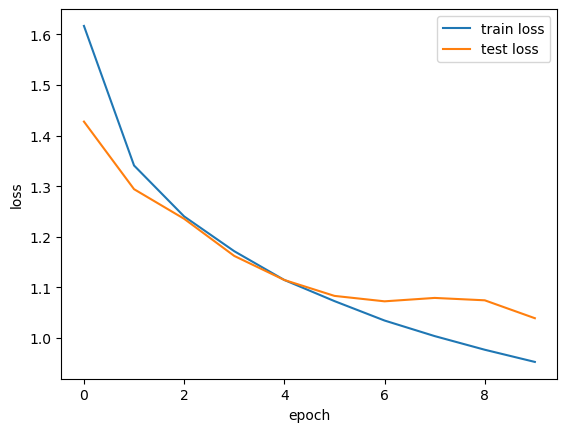

In [61]:
# import cifar10 dataset
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

cifar10_train = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
cifar10_test = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)

train_loader = torch.utils.data.DataLoader(cifar10_train, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(cifar10_test, batch_size=32, shuffle=False)

# [CORRECT CODE]
import torch.optim as optim

# [START CODE]
model = MLPMixer()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# [END CODE]


def train(model, train_loader, criterion, optimizer, device):
    model.train
    model.to(device)
    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):

        image = data[0].to(device)
        label = data[1].to(device)

        optimizer.zero_grad()

        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    return running_loss / len(train_loader)


def test(model, test_loader, criterion, device):
    model.eval()
    model.to(device)
    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():
        for data in test_loader:
            image = data[0].to(device)
            label = data[1].to(device)

            output = model(image)
            loss = criterion(output, label)
            running_loss += loss.item()

            _, predicted = torch.max(output, 1)
            total += label.size(0)
            correct += (predicted == label).sum().item()

    return running_loss / len(test_loader), correct / total


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = 10

train_loss_list = []
test_loss_list = []
test_acc_list = []

for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    test_loss, test_acc = test(model, test_loader, criterion, device)

    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)

    print(
        f"epoch: {epoch + 1}, train loss: {train_loss:.4f}, test loss: {test_loss:.4f}, test acc: {test_acc:.4f}"
    )

plt.plot(train_loss_list, label="train loss")
plt.plot(test_loss_list, label="test loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()